In [1]:
import pandas as pd
import numpy as np

In [2]:
###Load covid mobility data set into notebook
mobility = pd.read_csv('/Users/dianakither/Desktop/data.csv', dtype={'sub_region_1':str, 'sub_region_2':str},
                       low_memory=False)
mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,15/2/20,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,16/2/20,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,17/2/20,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,18/2/20,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,19/2/20,-2.0,0.0,4.0,-1.0,2.0,1.0


In [3]:
##### PART 1 - DATA SUBSET SELECTION #####

In [4]:
### Select data from Australia
aus = mobility.loc[mobility['country_region'] == 'Australia']
aus.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
150171,AU,Australia,NaN,NaN,NaN,NaN,NaN,15/2/20,4.0,3.0,-2.0,3.0,3.0,0.0
150172,AU,Australia,NaN,NaN,NaN,NaN,NaN,16/2/20,3.0,5.0,9.0,3.0,-1.0,0.0
150173,AU,Australia,NaN,NaN,NaN,NaN,NaN,17/2/20,-1.0,0.0,-6.0,7.0,17.0,-2.0
150174,AU,Australia,NaN,NaN,NaN,NaN,NaN,18/2/20,-3.0,-2.0,-13.0,7.0,14.0,-1.0
150175,AU,Australia,NaN,NaN,NaN,NaN,NaN,19/2/20,-1.0,-1.0,-6.0,8.0,13.0,-1.0


In [5]:
#### Size of data set
aus.shape

(76688, 14)

In [6]:
### Remove any columns in the data set that contain no data
aus = aus.dropna(axis = 1, how = 'all')
aus.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
150171,AU,Australia,NaN,NaN,NaN,15/2/20,4.0,3.0,-2.0,3.0,3.0,0.0
150172,AU,Australia,NaN,NaN,NaN,16/2/20,3.0,5.0,9.0,3.0,-1.0,0.0
150173,AU,Australia,NaN,NaN,NaN,17/2/20,-1.0,0.0,-6.0,7.0,17.0,-2.0
150174,AU,Australia,NaN,NaN,NaN,18/2/20,-3.0,-2.0,-13.0,7.0,14.0,-1.0
150175,AU,Australia,NaN,NaN,NaN,19/2/20,-1.0,-1.0,-6.0,8.0,13.0,-1.0


In [7]:
###  Identify all the sub regions in Australia
aus['sub_region_1'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia'], dtype=object)

In [8]:
###Select data from Victoria
vic = aus.loc[aus['sub_region_1'] == 'Victoria']
vic.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
196972,AU,Australia,Victoria,NaN,AU-VIC,15/2/20,3.0,3.0,-22.0,1.0,3.0,1.0
196973,AU,Australia,Victoria,NaN,AU-VIC,16/2/20,3.0,4.0,2.0,0.0,-2.0,0.0
196974,AU,Australia,Victoria,NaN,AU-VIC,17/2/20,-1.0,1.0,26.0,11.0,18.0,-3.0
196975,AU,Australia,Victoria,NaN,AU-VIC,18/2/20,-6.0,-6.0,-27.0,5.0,13.0,0.0
196976,AU,Australia,Victoria,NaN,AU-VIC,19/2/20,-2.0,-2.0,-17.0,6.0,13.0,-1.0


In [9]:
vic.shape

(17853, 12)

In [10]:
vic['iso_3166_2_code'].unique()

array(['AU-VIC', nan], dtype=object)

In [11]:
### Select relevant variables for data subset
vic = pd.concat([vic.iloc[:,3],vic.iloc[:,5:]], axis = 1)
vic.head()

,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
196972,NaN,15/2/20,3.0,3.0,-22.0,1.0,3.0,1.0
196973,NaN,16/2/20,3.0,4.0,2.0,0.0,-2.0,0.0
196974,NaN,17/2/20,-1.0,1.0,26.0,11.0,18.0,-3.0
196975,NaN,18/2/20,-6.0,-6.0,-27.0,5.0,13.0,0.0
196976,NaN,19/2/20,-2.0,-2.0,-17.0,6.0,13.0,-1.0


In [12]:
### Start process to select data from Melbourne
### List sub regions of Victoria where data was collected
vic['sub_region_2'].unique()

array([nan, 'Alpine Shire', 'Ballarat City', 'Banyule City',
       'Bass Coast Shire', 'Baw Baw Shire', 'Bayside City',
       'Benalla Rural City', 'Boroondara City', 'Brimbank City',
       'Campaspe Shire', 'Cardinia Shire', 'Central Goldfields Shire',
       'City of Casey', 'City of Hume', 'City of Knox',
       'City of Maribyrnong', 'City of Wyndham', 'City of Yarra',
       'Colac Otway Shire', 'Corangamite Shire', 'Darebin City',
       'East Gippsland Shire', 'Frankston City', 'Glen Eira City',
       'Glenelg Shire', 'Golden Plains Shire', 'Greater Bendigo City',
       'Greater Dandenong City', 'Greater Geelong City',
       'Greater Shepparton City', 'Hepburn Shire', 'Hobsons Bay City',
       'Horsham Rural City', 'Indigo Shire', 'Kingston City',
       'Latrobe City', 'Macedon Ranges Shire', 'Manningham City',
       'Maroondah City', 'Melbourne City', 'Melton City',
       'Mildura Rural City', 'Mitchell Shire', 'Moira Shire',
       'Monash City', 'Moonee Valley City'

In [13]:
### Select mobility data for the Melbourne metro area to build final data subset

### Remove rows with NaN values for the variable sub_region_2
vic_sub = vic.dropna(axis = 0, subset= ['sub_region_2'])
### Select data from 31 Melboourne councils
melb = vic_sub[vic_sub['sub_region_2'].str.contains('Bayside|Banyule|Booroondara|Brimbank|Cardinia|Casey'
        '|Darebin|Frankston|Glen Eira|Greater Dandenong|Hobsons Bay|Hume|Kingston|Knox|Manningham|Maribyrnong'
        '|Maroondah|Melbourne|Melton|Monash|Moonee Valley|Moreland|Mornington Peninsula|Nillumbik|Port Phillip'
        '|Stonnington|Whitehorse|Whittlesea|Wyndham|Yarra|Yarra Ranges')]
melb.head()

,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
197662,Banyule City,15/2/20,13.0,6.0,-21.0,14.0,2.0,0.0
197663,Banyule City,16/2/20,12.0,10.0,48.0,2.0,4.0,0.0
197664,Banyule City,17/2/20,3.0,-3.0,20.0,21.0,20.0,-3.0
197665,Banyule City,18/2/20,0.0,-6.0,-21.0,8.0,16.0,0.0
197666,Banyule City,19/2/20,0.0,-1.0,-9.0,11.0,15.0,-1.0


In [14]:
### Size of Melbourne data subset
melb.shape

(8708, 8)

In [15]:
##### PART 2 - DATABASE DESIGN #####

In [16]:
import pymongo
from pymongo import MongoClient

In [17]:
### Prepare Melbourne data subset for entry into database
### View Melbourne data subset
melb.head()

,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
197662,Banyule City,15/2/20,13.0,6.0,-21.0,14.0,2.0,0.0
197663,Banyule City,16/2/20,12.0,10.0,48.0,2.0,4.0,0.0
197664,Banyule City,17/2/20,3.0,-3.0,20.0,21.0,20.0,-3.0
197665,Banyule City,18/2/20,0.0,-6.0,-21.0,8.0,16.0,0.0
197666,Banyule City,19/2/20,0.0,-1.0,-9.0,11.0,15.0,-1.0


In [18]:
### Reset index for Melbourne data subset
melb.reset_index(level = 0, inplace = True)
del(melb['index'])
melb.head()

,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Banyule City,15/2/20,13.0,6.0,-21.0,14.0,2.0,0.0
1,Banyule City,16/2/20,12.0,10.0,48.0,2.0,4.0,0.0
2,Banyule City,17/2/20,3.0,-3.0,20.0,21.0,20.0,-3.0
3,Banyule City,18/2/20,0.0,-6.0,-21.0,8.0,16.0,0.0
4,Banyule City,19/2/20,0.0,-1.0,-9.0,11.0,15.0,-1.0


In [19]:
#### Check data types in Melbourne data subset
melb.dtypes

sub_region_2                                           object
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [20]:
#### Convert date variable in Melbourne data subset to datetime type

#### Convert date variable to datetime data type and then create new data frame date with this variable
date = pd.DataFrame([pd.to_datetime(melb['date'], dayfirst = True)]).T
date.head()

,date
0,2020-02-15
1,2020-02-16
2,2020-02-17
3,2020-02-18
4,2020-02-19


In [21]:
#### Add date dataframe to Melbourne data subset as column called datetime and remove original date column
melb.insert(2,'datetime', date['date'])
del(melb['date'])

### Confirm variable data types
melb.dtypes

sub_region_2                                                  object
datetime                                              datetime64[ns]
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
dtype: object

In [22]:
### View final Melbourne data subset
melb.head()

,sub_region_2,datetime,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Banyule City,2020-02-15,13.0,6.0,-21.0,14.0,2.0,0.0
1,Banyule City,2020-02-16,12.0,10.0,48.0,2.0,4.0,0.0
2,Banyule City,2020-02-17,3.0,-3.0,20.0,21.0,20.0,-3.0
3,Banyule City,2020-02-18,0.0,-6.0,-21.0,8.0,16.0,0.0
4,Banyule City,2020-02-19,0.0,-1.0,-9.0,11.0,15.0,-1.0


In [23]:
### Create Database

In [24]:
### Connect to MongoDB server
client = MongoClient('ec2-54-163-49-32.compute-1.amazonaws.com',
 443,
 username = 'diana',
 password = 'diana')

In [25]:
client.server_info()

{'version': '4.4.3',
 'gitVersion': '913d6b62acfbb344dde1b116f4161360acd8fd13',
 'modules': [],
 'allocator': 'tcmalloc',
 'javascriptEngine': 'mozjs',
 'sysInfo': 'deprecated',
 'versionArray': [4, 4, 3, 0],
 'openssl': {'running': 'OpenSSL 1.1.1f  31 Mar 2020',
  'compiled': 'OpenSSL 1.1.1f  31 Mar 2020'},
 'buildEnvironment': {'distmod': 'ubuntu2004',
  'distarch': 'x86_64',
  'cc': '/opt/mongodbtoolchain/v3/bin/gcc: gcc (GCC) 8.2.0',
  'ccflags': '-fno-omit-frame-pointer -fno-strict-aliasing -fasynchronous-unwind-tables -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -Werror -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-const-variable -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -fno-builtin-memcmp',
  'cxx': '/opt/mongodbtoolchain/v3/bin/g++: g++ (GCC) 8.2.0',
  'cxxflags': '-Woverloaded-virtual -Wno-maybe-uninitialized -fsized-deallocation -std=c++17',
  'linkflags': '-pthread -Wl,-

In [26]:
client.list_database_names()

['admin', 'config', 'local']

In [27]:
###Create database melbcovid for Melbourne Covid Mobility Data
database = client.melb_covid

In [28]:
### Create individual collections for each category of mobility data in database
retail_coll = database['retail_and_recreation']
grocery_coll = database['grocery_and_pharmacy']
parks_coll = database['parks']
transit_coll = database['transit_stations']
work_coll = database['workplaces']
home_coll = database['residential']

In [29]:
### Create data subsets for each mobility category, remove missing values, convert to dictionary then list 
### to load into MongoDB
### Retail and Recreation
retail = melb.iloc[:, :3]
retail.dropna()
retail = retail.to_dict('records')
retail = list(retail)

In [30]:
### Grocery and Pharmacy
grocery = pd.concat([melb.iloc[:,:2],melb.iloc[:,3]], axis = 1)
grocery.dropna()
grocery = grocery.to_dict('records')
grocery = list(grocery)

In [31]:
### Parks
park = pd.concat([melb.iloc[:,:2],melb.iloc[:,4]], axis = 1)
park.dropna()
park = park.to_dict('records')
park = list(park)

In [32]:
### Transit stations
transit = pd.concat([melb.iloc[:,:2],melb.iloc[:,5]], axis = 1)
transit.dropna()
transit = transit.to_dict('records')
transit = list(transit)

In [33]:
### Workplaces
workplace = pd.concat([melb.iloc[:,:2],melb.iloc[:,6]], axis = 1)
workplace.dropna()
workplace = workplace.to_dict('records')
workplace = list(workplace)

In [34]:
### Residential
residential = pd.concat([melb.iloc[:,:2],melb.iloc[:,7]], axis = 1)
residential.dropna()
residential = residential.to_dict('records')
residential = list(residential)

In [35]:
### Insert category lists into collections in database
### Retail
retail_coll.insert_many(retail)

In [36]:
### Grocery
grocery_coll.insert_many(grocery)

In [37]:
### Parks
parks_coll.insert_many(park)

In [38]:
###Transit stations
transit_coll.insert_many(transit)

In [39]:
###Workplaces
work_coll.insert_many(workplace)

In [40]:
###Residential
home_coll.insert_many(residential)

In [41]:
client.list_database_names()

['admin', 'config', 'local', 'melb_covid']

In [42]:
#### PART 3 - DATA ANALYSIS MELBOURNE COVID MOBILITY DATA SET

In [43]:
### Data is divided in two parts up till the 30th June 2020 and after 1st July 2020
### Summary statistics explored and data is plotted

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [45]:
### 1. RETAIL AND RECREATION
###Retail and Recreation data 15/2/20-30/6/20
date_1 = datetime(2020,7,1)
query = {"datetime": {"$lt": date_1}}
retail_sub_1 = pd.DataFrame(list(retail_coll.find(query).sort("datetime")))
retail_sub_1.head()

,_id,datetime,retail_and_recreation_percent_change_from_baseline,sub_region_2
0,5ffffd837bce0de2f44c6d54,2020-02-15,13.0,Banyule City
1,5ffffd837bce0de2f44c6e74,2020-02-15,4.0,Bayside City
2,5ffffd837bce0de2f44c6f91,2020-02-15,7.0,Brimbank City
3,5ffffd837bce0de2f44c70b4,2020-02-15,9.0,Cardinia Shire
4,5ffffd837bce0de2f44c71d7,2020-02-15,6.0,City of Casey


In [46]:
### Retail and recreation data 1/7/20-30/11/20
date_3 = datetime(2020,6,30)
query = {"datetime": {"$gt": date_3}}
retail_sub_2 = pd.DataFrame(list(retail_coll.find(query).sort("datetime")))
retail_sub_2.head()

,_id,datetime,retail_and_recreation_percent_change_from_baseline,sub_region_2
0,5ffffd837bce0de2f44c6ddd,2020-07-01,-9.0,Banyule City
1,5ffffd837bce0de2f44c6efd,2020-07-01,-10.0,Bayside City
2,5ffffd837bce0de2f44c701a,2020-07-01,-18.0,Brimbank City
3,5ffffd837bce0de2f44c713d,2020-07-01,-13.0,Cardinia Shire
4,5ffffd837bce0de2f44c7260,2020-07-01,-14.0,City of Casey


In [47]:
### Calculate avergage % change in movement for Melbourne as a whole daily and calculate statistics
retail_1 = retail_sub_1.groupby('datetime')['retail_and_recreation_percent_change_from_baseline'].mean()
retail_1.describe()

count    137.000000
mean     -23.222141
std       17.303880
min      -78.833333
25%      -37.800000
50%      -22.733333
75%      -11.366667
max        8.466667
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64

In [48]:
retail_2 = retail_sub_2.groupby('datetime')['retail_and_recreation_percent_change_from_baseline'].mean()
retail_2.describe()

count    154.000000
mean     -38.829111
std       16.345696
min      -65.321429
25%      -52.000000
50%      -43.300000
75%      -23.291667
max       -0.766667
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

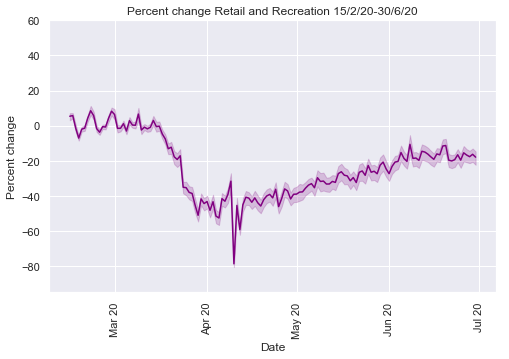

In [50]:
### Plot Retail and Recreation
### 15/2/20-30/6/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'retail_and_recreation_percent_change_from_baseline', data=retail_sub_1, 
             color = 'purple')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Retail and Recreation 15/2/20-30/6/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

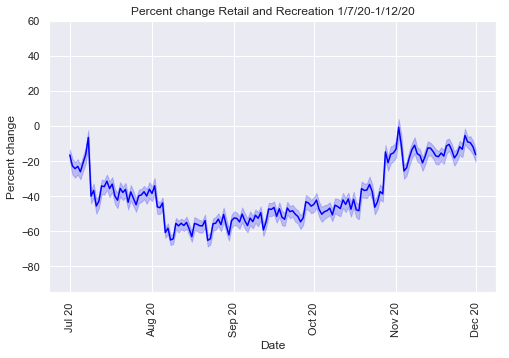

In [51]:
### Plot Retail and Recreation
### 1/7/20-1/12/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'retail_and_recreation_percent_change_from_baseline', data=retail_sub_2, 
             color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Retail and Recreation 1/7/20-1/12/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

In [53]:
###2 - GROCERY AND PHARMACY
###Grocery and Pharmacy data 15/2/20-30/6/20
date_1 = datetime(2020,7,1)
query = {"datetime": {"$lt": date_1}}
grocery_sub_1 = pd.DataFrame(list(grocery_coll.find(query).sort("datetime")))
grocery_sub_1.head()

,_id,datetime,grocery_and_pharmacy_percent_change_from_baseline,sub_region_2
0,5ffffd8c7bce0de2f44c8f58,2020-02-15,6.0,Banyule City
1,5ffffd8c7bce0de2f44c9078,2020-02-15,8.0,Bayside City
2,5ffffd8c7bce0de2f44c9195,2020-02-15,8.0,Brimbank City
3,5ffffd8c7bce0de2f44c92b8,2020-02-15,0.0,Cardinia Shire
4,5ffffd8c7bce0de2f44c93db,2020-02-15,10.0,City of Casey


In [54]:
### Grocery and Pharmacy data 1/7/20-30/11/20
date_2 = datetime(2020,6,30)
query = {"datetime": {"$gt": date_2}}
grocery_sub_2 = pd.DataFrame(list(grocery_coll.find(query).sort("datetime")))
grocery_sub_2.head()

,_id,datetime,grocery_and_pharmacy_percent_change_from_baseline,sub_region_2
0,5ffffd8c7bce0de2f44c8fe1,2020-07-01,-2.0,Banyule City
1,5ffffd8c7bce0de2f44c9101,2020-07-01,1.0,Bayside City
2,5ffffd8c7bce0de2f44c921e,2020-07-01,6.0,Brimbank City
3,5ffffd8c7bce0de2f44c9341,2020-07-01,1.0,Cardinia Shire
4,5ffffd8c7bce0de2f44c9464,2020-07-01,-7.0,City of Casey


In [55]:
grocery_1 = grocery_sub_1.groupby('datetime')['grocery_and_pharmacy_percent_change_from_baseline'].mean()
grocery_1.describe()

count    137.000000
mean       1.058084
std       14.458385
min      -75.275862
25%       -6.448276
50%        0.733333
75%        8.266667
max       48.896552
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64

In [56]:
grocery_2 = grocery_sub_2.groupby('datetime')['grocery_and_pharmacy_percent_change_from_baseline'].mean()
grocery_2.describe()

count    154.000000
mean      -8.260469
std       10.771833
min      -30.620690
25%      -16.753161
50%       -8.068391
75%        0.816667
max       13.827586
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

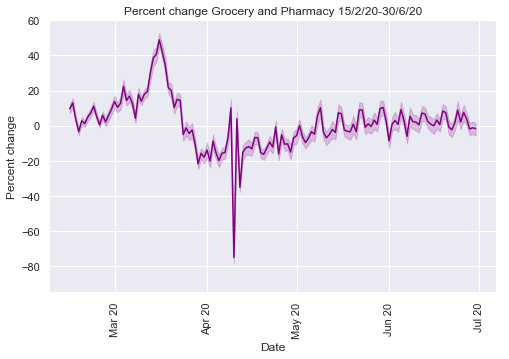

In [57]:
### Plot Grocery and Pharmacy
### 15/2/20-30/6/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'grocery_and_pharmacy_percent_change_from_baseline', data=grocery_sub_1, 
             color = 'purple')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Grocery and Pharmacy 15/2/20-30/6/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

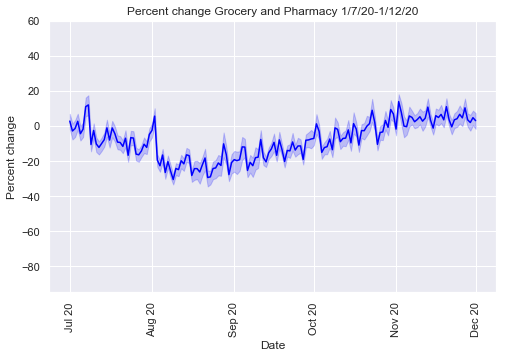

In [58]:
### Plot Grocery and Pharmacy
### 1/7/20-1/12/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'grocery_and_pharmacy_percent_change_from_baseline', data=grocery_sub_2, 
             color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Grocery and Pharmacy 1/7/20-1/12/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

In [59]:
###3 - PARKS
###Parks data 15/2/20-30/6/20
date_1 = datetime(2020,7,1)
query = {"datetime": {"$lt": date_1}}
parks_sub_1 = pd.DataFrame(list(parks_coll.find(query).sort("datetime")))
parks_sub_1.head()

,_id,datetime,parks_percent_change_from_baseline,sub_region_2
0,5ffffd947bce0de2f44cb15c,2020-02-15,-21.0,Banyule City
1,5ffffd947bce0de2f44cb27c,2020-02-15,-47.0,Bayside City
2,5ffffd947bce0de2f44cb399,2020-02-15,-15.0,Brimbank City
3,5ffffd947bce0de2f44cb4bc,2020-02-15,-6.0,Cardinia Shire
4,5ffffd947bce0de2f44cb5df,2020-02-15,-21.0,City of Casey


In [60]:
###Parks data 1/7/20-30/11/20
date_2 = datetime(2020,6,30)
query = {"datetime": {"$gt": date_2}}
parks_sub_2 = pd.DataFrame(list(parks_coll.find(query).sort("datetime")))
parks_sub_2.head()

,_id,datetime,parks_percent_change_from_baseline,sub_region_2
0,5ffffd947bce0de2f44cb1e5,2020-07-01,48.0,Banyule City
1,5ffffd947bce0de2f44cb305,2020-07-01,21.0,Bayside City
2,5ffffd947bce0de2f44cb422,2020-07-01,-10.0,Brimbank City
3,5ffffd947bce0de2f44cb545,2020-07-01,-21.0,Cardinia Shire
4,5ffffd947bce0de2f44cb668,2020-07-01,21.0,City of Casey


In [61]:
parks_1 = parks_sub_1.groupby('datetime')['parks_percent_change_from_baseline'].mean()
parks_1.describe()

count    137.000000
mean      -8.513181
std       23.867285
min      -66.533333
25%      -22.600000
50%       -9.100000
75%        8.266667
max       74.620690
Name: parks_percent_change_from_baseline, dtype: float64

In [62]:
parks_2 = parks_sub_2.groupby('datetime')['parks_percent_change_from_baseline'].mean()
parks_2.describe()

count    154.000000
mean     -11.595909
std       37.555880
min      -85.600000
25%      -34.775000
50%      -13.400000
75%       15.450000
max      106.275862
Name: parks_percent_change_from_baseline, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

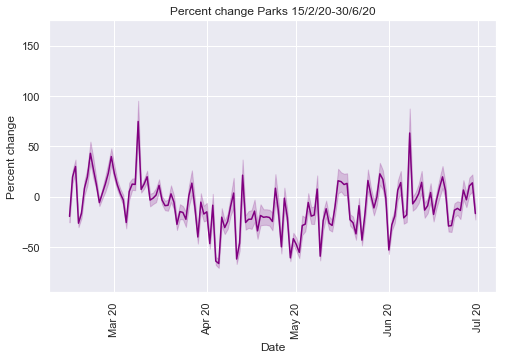

In [63]:
### Plot Parks
### 15/2/20-30/6/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'parks_percent_change_from_baseline', data=parks_sub_1, 
             color = 'purple')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,175])
plt.title('Percent change Parks 15/2/20-30/6/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

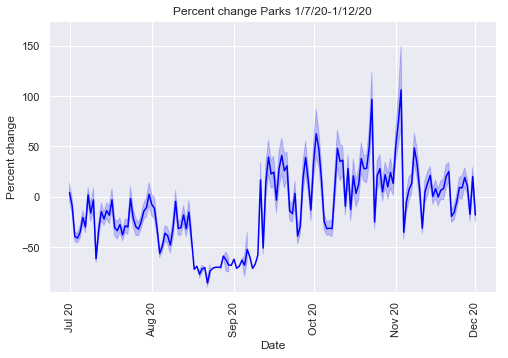

In [64]:
### Plot Parks
### 1/7/20-1/12/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'parks_percent_change_from_baseline', data=parks_sub_2, 
             color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,175])
plt.title('Percent change Parks 1/7/20-1/12/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

In [65]:
###4 - TRANSIT
###Transit data 15/2/20-30/6/20
date_1 = datetime(2020,7,1)
query = {"datetime": {"$lt": date_1}}
transit_sub_1 = pd.DataFrame(list(transit_coll.find(query).sort("datetime")))
transit_sub_1.head()

,_id,datetime,sub_region_2,transit_stations_percent_change_from_baseline
0,5ffffd9b7bce0de2f44cd360,2020-02-15,Banyule City,14.0
1,5ffffd9b7bce0de2f44cd480,2020-02-15,Bayside City,-12.0
2,5ffffd9b7bce0de2f44cd59d,2020-02-15,Brimbank City,3.0
3,5ffffd9b7bce0de2f44cd6c0,2020-02-15,Cardinia Shire,8.0
4,5ffffd9b7bce0de2f44cd7e3,2020-02-15,City of Casey,14.0


In [66]:
###Transit data 1/7/20-30/11/20
date_2 = datetime(2020,6,30)
query = {"datetime": {"$gt": date_2}}
transit_sub_2 = pd.DataFrame(list(transit_coll.find(query).sort("datetime")))
transit_sub_2.head()

,_id,datetime,sub_region_2,transit_stations_percent_change_from_baseline
0,5ffffd9b7bce0de2f44cd3e9,2020-07-01,Banyule City,-54.0
1,5ffffd9b7bce0de2f44cd509,2020-07-01,Bayside City,-60.0
2,5ffffd9b7bce0de2f44cd626,2020-07-01,Brimbank City,-54.0
3,5ffffd9b7bce0de2f44cd749,2020-07-01,Cardinia Shire,-16.0
4,5ffffd9b7bce0de2f44cd86c,2020-07-01,City of Casey,-31.0


In [67]:
transit_1 = transit_sub_1.groupby('datetime')['transit_stations_percent_change_from_baseline'].mean()
transit_1.describe()

count    137.000000
mean     -34.409506
std       28.410252
min      -76.333333
25%      -55.500000
50%      -45.310345
75%      -22.900000
max       23.233333
Name: transit_stations_percent_change_from_baseline, dtype: float64

In [68]:
transit_2 = transit_sub_2.groupby('datetime')['transit_stations_percent_change_from_baseline'].mean()
transit_2.describe()

count    154.000000
mean     -58.001424
std       11.777046
min      -76.600000
25%      -67.300000
50%      -58.466667
75%      -51.466667
max      -24.100000
Name: transit_stations_percent_change_from_baseline, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

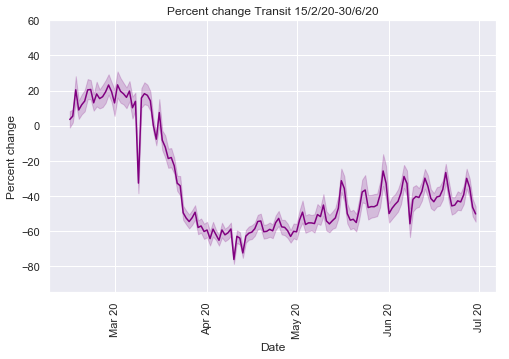

In [69]:
### Plot Transit
### 15/2/20-30/6/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'transit_stations_percent_change_from_baseline', data=transit_sub_1, 
             color = 'purple')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Transit 15/2/20-30/6/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

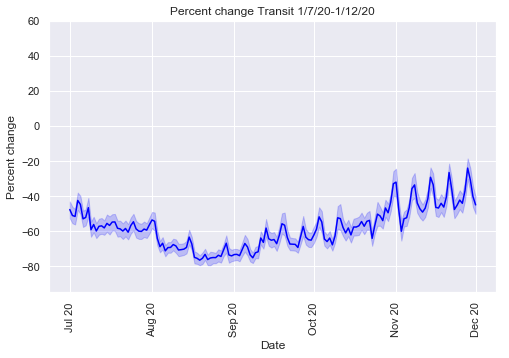

In [70]:
### Plot Transit
###1/7/20-1/12/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'transit_stations_percent_change_from_baseline', data=transit_sub_2, 
             color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Transit 1/7/20-1/12/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

In [71]:
###5 - WORKPLACE
###Workplace data 15/2/20-30/6/20
date_1 = datetime(2020,7,1)
query = {"datetime": {"$lt": date_1}}
work_sub_1 = pd.DataFrame(list(work_coll.find(query).sort("datetime")))
work_sub_1.head()

,_id,datetime,sub_region_2,workplaces_percent_change_from_baseline
0,5ffffd9f7bce0de2f44cf564,2020-02-15,Banyule City,2.0
1,5ffffd9f7bce0de2f44cf684,2020-02-15,Bayside City,7.0
2,5ffffd9f7bce0de2f44cf7a1,2020-02-15,Brimbank City,7.0
3,5ffffd9f7bce0de2f44cf8c4,2020-02-15,Cardinia Shire,4.0
4,5ffffd9f7bce0de2f44cf9e7,2020-02-15,City of Casey,1.0


In [72]:
###Workplace data 1/7/20-30/11/20
date_2 = datetime(2020,6,30)
query = {"datetime": {"$gt": date_2}}
work_sub_2 = pd.DataFrame(list(work_coll.find(query).sort("datetime")))
work_sub_2.head()

,_id,datetime,sub_region_2,workplaces_percent_change_from_baseline
0,5ffffd9f7bce0de2f44cf5ed,2020-07-01,Banyule City,-40.0
1,5ffffd9f7bce0de2f44cf70d,2020-07-01,Bayside City,-45.0
2,5ffffd9f7bce0de2f44cf82a,2020-07-01,Brimbank City,-30.0
3,5ffffd9f7bce0de2f44cf94d,2020-07-01,Cardinia Shire,-27.0
4,5ffffd9f7bce0de2f44cfa70,2020-07-01,City of Casey,-27.0


In [73]:
work_1 = work_sub_1.groupby('datetime')['workplaces_percent_change_from_baseline'].mean()
work_1.describe()

count    137.000000
mean     -25.637528
std       23.029325
min      -85.366667
25%      -42.466667
50%      -31.633333
75%       -6.800000
max       18.700000
Name: workplaces_percent_change_from_baseline, dtype: float64

In [74]:
work_2 = work_sub_2.groupby('datetime')['workplaces_percent_change_from_baseline'].mean()
work_2.describe()

count    154.000000
mean     -38.760909
std       12.594948
min      -75.000000
25%      -48.591667
50%      -38.833333
75%      -31.400000
max       -5.866667
Name: workplaces_percent_change_from_baseline, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

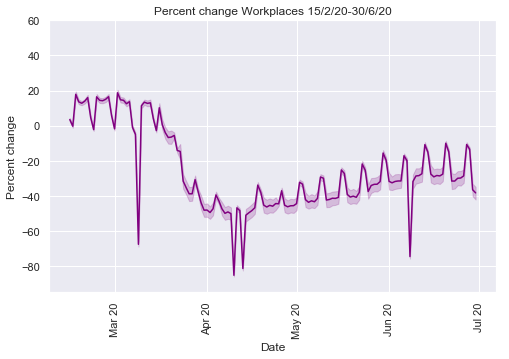

In [75]:
### Plot Workplace
### 15/2/20-30/6/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'workplaces_percent_change_from_baseline', data=work_sub_1, 
             color = 'purple')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Workplaces 15/2/20-30/6/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

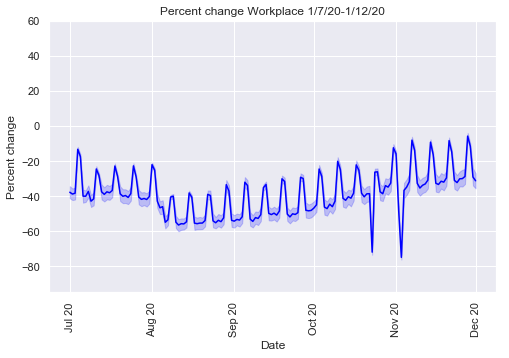

In [76]:
### Plot Workplace
###1/7/20-1/12/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'workplaces_percent_change_from_baseline', data=work_sub_2, 
             color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Workplace 1/7/20-1/12/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

In [77]:
###6 - RESIDENTIAL
###Residential data 15/2/20-30/6/20
date_1 = datetime(2020,7,1)
query = {"datetime": {"$lt": date_1}}
home_sub_1 = pd.DataFrame(list(home_coll.find(query).sort("datetime")))
home_sub_1.head()

,_id,datetime,residential_percent_change_from_baseline,sub_region_2
0,5ffffda57bce0de2f44d1768,2020-02-15,0.0,Banyule City
1,5ffffda57bce0de2f44d1888,2020-02-15,NaN,Bayside City
2,5ffffda57bce0de2f44d19a5,2020-02-15,0.0,Brimbank City
3,5ffffda57bce0de2f44d1ac8,2020-02-15,0.0,Cardinia Shire
4,5ffffda57bce0de2f44d1beb,2020-02-15,0.0,City of Casey


In [78]:
###Residential data 1/7/20-30/11/20
date_2 = datetime(2020,6,30)
query = {"datetime": {"$gt": date_2}}
home_sub_2 = pd.DataFrame(list(home_coll.find(query).sort("datetime")))
home_sub_2.head()

,_id,datetime,residential_percent_change_from_baseline,sub_region_2
0,5ffffda57bce0de2f44d17f1,2020-07-01,16.0,Banyule City
1,5ffffda57bce0de2f44d1911,2020-07-01,17.0,Bayside City
2,5ffffda57bce0de2f44d1a2e,2020-07-01,13.0,Brimbank City
3,5ffffda57bce0de2f44d1b51,2020-07-01,13.0,Cardinia Shire
4,5ffffda57bce0de2f44d1c74,2020-07-01,13.0,City of Casey


In [79]:
home_1 = home_sub_1.groupby('datetime')['residential_percent_change_from_baseline'].mean()
home_1.describe()

count    137.000000
mean      13.462900
std        9.271659
min       -3.400000
25%        7.880000
50%       15.533333
75%       21.000000
max       36.866667
Name: residential_percent_change_from_baseline, dtype: float64

In [80]:
home_2 = home_sub_2.groupby('datetime')['residential_percent_change_from_baseline'].mean()
home_2.describe()

count    154.000000
mean      19.348592
std        6.395269
min        2.586207
25%       15.366071
50%       20.291228
75%       24.068391
max       29.892857
Name: residential_percent_change_from_baseline, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

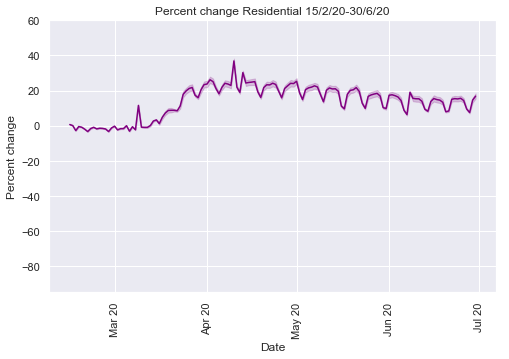

In [81]:
### Plot Residential
### 15/2/20-30/6/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'residential_percent_change_from_baseline', data=home_sub_1, 
             color = 'purple')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Residential 15/2/20-30/6/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

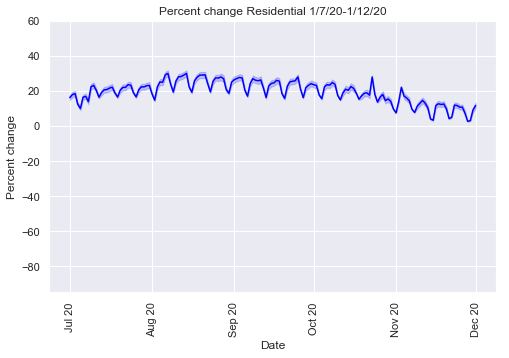

In [82]:
### Plot Residential
###1/7/20-1/12/20

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x = 'datetime', y = 'residential_percent_change_from_baseline', data=home_sub_2, 
             color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Percent change')
plt.ylim([-95,60])
plt.title('Percent change Residential 1/7/20-1/12/20')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.show